# Using Neural Networks for classification
- Synthetic data using `sklearn's` `make_moons` and `make_circles` datasets
- Fashion MNIST dataset -> with 88%+ accuracy

In [1]:
from sklearn.datasets import make_moons

# Make 1000 examples
n_samples = 1000
# Create circles 
X,y = make_moons(n_samples, noise=0.03, random_state=42)

In [2]:
X.shape, y.shape

((1000, 2), (1000,))

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
X[:10]

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       [ 0.41276802, -0.37638459],
       [-0.84532016,  0.52879908],
       [ 0.57954249, -0.35297867],
       [ 0.29488426, -0.20923768],
       [-0.01448804,  0.4358961 ],
       [ 1.62651037, -0.28120742],
       [ 0.67159767,  0.78642227]])

In [5]:
import matplotlib.pyplot as plt 
import pandas as pd 
moons = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
moons

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


In [6]:
# Ensure two classes have equal number of samples
moons['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

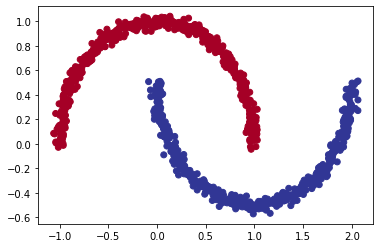

In [7]:
# Visualize plot 
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Look at the first sample and associated label
X[0], y[0]

(array([-0.00933187,  0.39098105]), 1)

## Create train/test splits
- sklearn's `train_test_split`

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

## Build the model 

In [9]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [10]:
# 1. Create the model using the Sequential API 
moon_model_0 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Binary classification
])

# 2. Compile the model 
moon_model_0.compile(loss='BinaryCrossentropy',
                     optimizer = Adam(),
                     metrics=['accuracy'])

# 3. Fit the model 
history_1 = moon_model_0.fit(X_train, y_train, 
                             epochs=25)

Epoch 1/25
25/25 [==============================] - 5s 2ms/step - loss: 0.5391 - accuracy: 0.8313
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.8612
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.8750
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.8938
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9150
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1280 - accuracy: 0.9463
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0899 - accuracy: 0.9588
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9775
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9937
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9987
Epoch 11/25
25/25 [

In [11]:
moon_model_0.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 7.5775e-04 - accuracy: 1.0000


[0.000757745117880404, 1.0]

In [20]:
# Get predictions (these will be probablities for each class)
moon_model_0_pred_probs = moon_model_0.predict(X_test)
moon_model_0_pred_probs[:10]

array([[9.9961144e-01],
       [9.9995840e-01],
       [9.9986708e-01],
       [2.0026023e-07],
       [9.9977869e-01],
       [9.9994075e-01],
       [1.3248244e-06],
       [2.5385898e-04],
       [9.9982762e-01],
       [9.9975544e-01]], dtype=float32)

In [21]:
moon_model_0_pred_probs.shape

(200, 1)

In [23]:
# Round to 0 or 1
moon_model_0_preds = tf.round(moon_model_0_pred_probs)
moon_model_0_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [12]:
import numpy as np 

In [13]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100))
xx.shape, yy.shape

((100, 100), (100, 100))

In [24]:
# Function taken from Zero to Mastery's TensorFlow Developer course
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X

  Parameters
  ----------

  model : a trained TensorFlow model

  X : (array-like), array of features

  y : (array-like), array of labels

  Returns
  -------

  A plot of the decision boundary predicted by the TensorFlow classification model

  """

  #Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  # Create the coordinate matrices using np.meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
  
  #Create X values
  x_in = np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together

  #Make predictions
  y_pred = model.predict(x_in)

  #Check for multi-class classification
  if len(y_pred[0]) > 1:
    print("Multiclass classification")

    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary classification")
    # Round to 0 or 1 for y_pred
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.8)
  plt.scatter(X[:,0],X[:,1],c=y,s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())



Binary classification


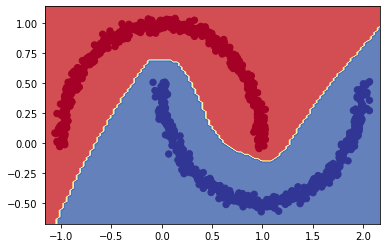

In [25]:
# Check the decision boundary for our moon model 
plot_decision_boundary(model=moon_model_0, X=X, y=y)

Binary classification
Binary classification


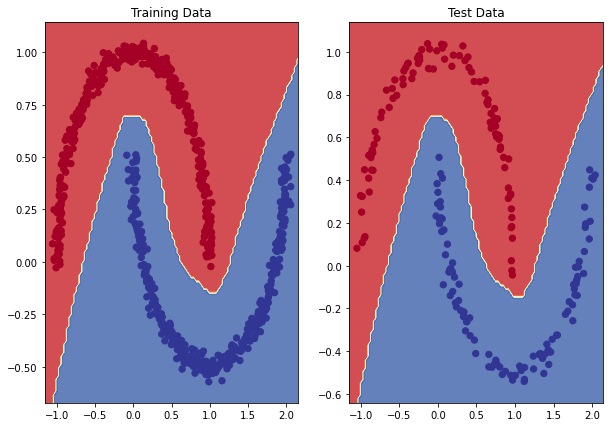

In [26]:
# Plot decision boundaries for the training and test sets
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model=moon_model_0, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test Data")
plot_decision_boundary(model=moon_model_0, X=X_test, y=y_test)

### Plot the loss curves (loss and accuracy)

Text(0.5, 1.0, 'Moon_Model_0 Loss Curves')

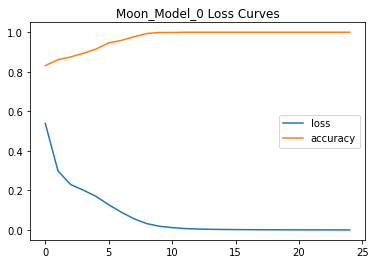

In [27]:
import pandas as pd
# Plot should show loss decreasing
pd.DataFrame(history_1.history).plot()
plt.title("Moon_Model_0 Loss Curves")

## Using the moon model on circular data

In [34]:
# Does the moon model work on a circular dataset created with sklearn's make circles?
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles 
X_circles,y_circles = make_circles(n_samples, noise=0.05, random_state=42)

In [35]:
circles = pd.DataFrame({"X0":X_circles[:,0], "X1":X_circles[:,1], "label":y_circles})
circles.head()

,X0,X1,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0


In [36]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

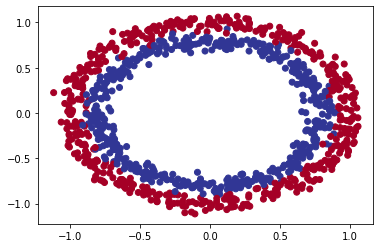

In [38]:
plt.scatter(X_circles[:,0], X_circles[:,1], c=y_circles, cmap=plt.cm.RdYlBu)

In [39]:
moon_model_0.evaluate(X_circles, y_circles)

32/32 [==============================] - 0s 2ms/step - loss: 4.1870 - accuracy: 0.5220


[4.187028408050537, 0.5220000147819519]

Binary classification


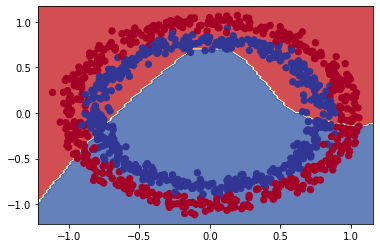

In [40]:
plot_decision_boundary(model=moon_model_0, X=X_circles, y=y_circles)

As shown with the decsion boundary, the neural network does not generalize to circular data 

## 88%+ Accuracy on Fashion MNIST

* Plot a confusion matrix

In [41]:
# Get the Fashion MNIST Dataset from tensorflow datasets

import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist 

# Data is already sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [42]:
# let's look at the first training example 
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [43]:
# Examine the shape of the data/labels
train_data[0].shape, train_labels[0].shape

((28, 28), ())

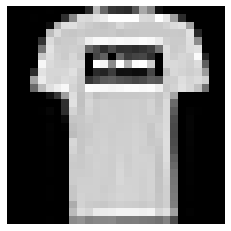

In [44]:
# Plot a single sample 
import matplotlib.pyplot as plt 
plt.imshow(train_data[1], cmap='gray')
plt.axis(False);

In [45]:
# How many classes do we have?
import numpy as np 
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [46]:
# Can find class names on TensorFlow webite
# Create a list with the class names

class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

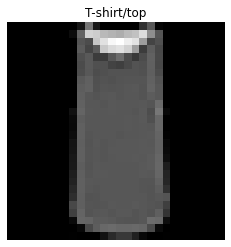

In [48]:
# Plot image and associated label
plt.imshow(train_data[2], cmap='gray')
plt.title(class_names[train_labels[2]])
plt.axis(False);

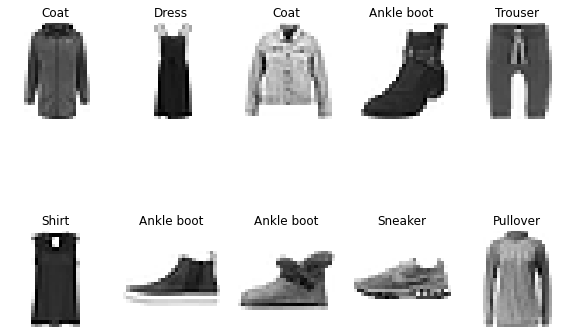

In [50]:
# Plot multiple random images at once to examine the data even further
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

for i in range(10):
  ax = plt.subplot(2,5,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Build a series of multi-class classification models

- Goal is to achieve at least 88% accuracy
- input_shape = 28x28
- Output shape = 10 (one per class)
- Loss function = SparseCategoricalCrossentropy (labels are not one-hot encoded)
- Output layer activation function = Softmax (beacuse multiclass, not binary)

In [51]:
# Keep in mind our image data is not normalized
# Create the model 
mnist_model_1 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

# Compile the model 
mnist_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model 
history_mnist_1 = mnist_model_1.fit(train_data, train_labels,
                                    epochs=10,
                                    validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3426 - accuracy: 0.7420 - val_loss: 0.6477 - val_accuracy: 0.7976
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5959 - accuracy: 0.8027 - val_loss: 0.6355 - val_accuracy: 0.7893
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5611 - accuracy: 0.8087 - val_loss: 0.5671 - val_accuracy: 0.8031
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5151 - accuracy: 0.8226 - val_loss: 0.4947 - val_accuracy: 0.8157
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4858 - accuracy: 0.8319 - val_loss: 0.5127 - val_accuracy: 0.8343
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4613 - accuracy: 0.8376 - val_loss: 0.4811 - val_accuracy: 0.8410
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4374 - accuracy: 0.8469 - val_loss: 0.5626 - val_accuracy:

In [52]:
mnist_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [53]:
mnist_model_1.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4593 - accuracy: 0.8369


[0.45931920409202576, 0.836899995803833]

Not at 88% accuracy. We will normalize our pixel data now 

In [54]:
# Normalize the data
# Pixel values range from 0 - 255 

train_data_norm = train_data / 255.0 
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [55]:
# Same model architecture but with noramlized data (NNs prefer normalized data )
mnist_model_2 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

# Compile the model 
mnist_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model 
history_mnist_2 = mnist_model_2.fit(train_data_norm, train_labels,
                                    epochs=10,
                                    validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4954 - accuracy: 0.8230 - val_loss: 0.4274 - val_accuracy: 0.8412
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3696 - accuracy: 0.8648 - val_loss: 0.3802 - val_accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3329 - accuracy: 0.8777 - val_loss: 0.3631 - val_accuracy: 0.8694
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3098 - accuracy: 0.8851 - val_loss: 0.3615 - val_accuracy: 0.8715
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2941 - accuracy: 0.8909 - val_loss: 0.3746 - val_accuracy: 0.8676
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2782 - accuracy: 0.8953 - val_loss: 0.3378 - val_accuracy: 0.8790
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2661 - accuracy: 0.9010 - val_loss: 0.3389 - val_accuracy:

In [56]:
mnist_model_2.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3409 - accuracy: 0.8820


[0.3409368395805359, 0.8820000290870667]

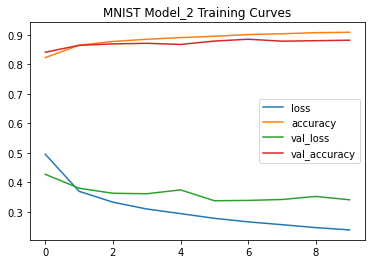

In [62]:
# Let's plot training curves 
pd.DataFrame(history_mnist_2.history).plot()
plt.title("MNIST Model_2 Training Curves");

Model is performing better with the normalized data. Right at the cusp of 88% accuracy. Let's see if we can get it a little better


In [58]:
# Same model archiecture as minst_model_2, same normalized data, just trained for 5 epochs longer
mnist_model_3 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

# Compile the model 
mnist_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model 
history_mnist_3 = mnist_model_3.fit(train_data_norm, train_labels,
                                    epochs=15,
                                    validation_data=(test_data_norm, test_labels))

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4903 - accuracy: 0.8252 - val_loss: 0.4386 - val_accuracy: 0.8467
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3707 - accuracy: 0.8649 - val_loss: 0.3787 - val_accuracy: 0.8618
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3354 - accuracy: 0.8752 - val_loss: 0.3737 - val_accuracy: 0.8666
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.8864 - val_loss: 0.3676 - val_accuracy: 0.8720
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2927 - accuracy: 0.8900 - val_loss: 0.3512 - val_accuracy: 0.8729
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2802 - accuracy: 0.8962 - val_loss: 0.3587 - val_accuracy: 0.8753
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2678 - accuracy: 0.8989 - val_loss: 0.3359 - val_accuracy:

In [59]:
# Evaluate model_3
mnist_model_3.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3353 - accuracy: 0.8906


[0.3353119492530823, 0.8906000256538391]

Text(0.5, 1.0, 'MNIST Model_3 Training Curves')

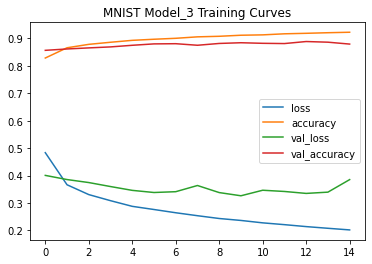

In [ ]:
pd.DataFrame(history_mnist_3.history).plot()
plt.title("MNIST Model_3 Training Curves");

Slight gain in accuracy from training for 5 more epochs. Now 89% From the accuracy on the training data and val_loss on the graph, it looks like the model might be overfitting the training data given the increase in val_loss near the end

In [66]:
# Let's add one Dropout layer to see if it helps with overfitting
# Everything else will stay the same
mnist_model_4 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

# Compile the model 
mnist_model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model 
history_mnist_4 = mnist_model_4.fit(train_data_norm, train_labels,
                                    epochs=15,
                                    validation_data=(test_data_norm, test_labels))

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5631 - accuracy: 0.7968 - val_loss: 0.4376 - val_accuracy: 0.8399
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4269 - accuracy: 0.8465 - val_loss: 0.3945 - val_accuracy: 0.8621
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3939 - accuracy: 0.8565 - val_loss: 0.3735 - val_accuracy: 0.8650
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3717 - accuracy: 0.8629 - val_loss: 0.3610 - val_accuracy: 0.8669
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3586 - accuracy: 0.8685 - val_loss: 0.3624 - val_accuracy: 0.8708
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3437 - accuracy: 0.8722 - val_loss: 0.3597 - val_accuracy: 0.8689
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3351 - accuracy: 0.8756 - val_loss: 0.3450 - val_accuracy:

In [67]:
mnist_model_4.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.8871


[0.31849196553230286, 0.8870999813079834]

Text(0.5, 1.0, 'MNIST Model_4 Training Curves')

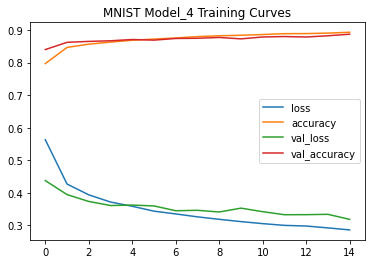

In [68]:
# Plot the training curves for mnist_model_4
pd.DataFrame(history_mnist_4.history).plot()
plt.title("MNIST Model_4 Training Curves")

Looking at the val_loss curve, it still appears to be decreasing at the end of training. More training could possibly increase accuracy even further. 

In [69]:
# Same model architecture as model_4 but trained for 5 more epochs
# Everything else will stay the same
mnist_model_5 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

# Compile the model 
mnist_model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model 
history_mnist_5 = mnist_model_5.fit(train_data_norm, train_labels,
                                    epochs=20,
                                    validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5645 - accuracy: 0.7975 - val_loss: 0.4181 - val_accuracy: 0.8463
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4269 - accuracy: 0.8447 - val_loss: 0.4132 - val_accuracy: 0.8517
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3955 - accuracy: 0.8536 - val_loss: 0.3833 - val_accuracy: 0.8594
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3728 - accuracy: 0.8630 - val_loss: 0.3771 - val_accuracy: 0.8642
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3581 - accuracy: 0.8672 - val_loss: 0.3617 - val_accuracy: 0.8714
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3476 - accuracy: 0.8720 - val_loss: 0.3547 - val_accuracy: 0.8731
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3348 - accuracy: 0.8759 - val_loss: 0.3401 - val_accuracy:

In [70]:
mnist_model_5_results = mnist_model_5.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3168 - accuracy: 0.8864


Text(0.5, 1.0, 'MNIST Model_5 Training Curves')

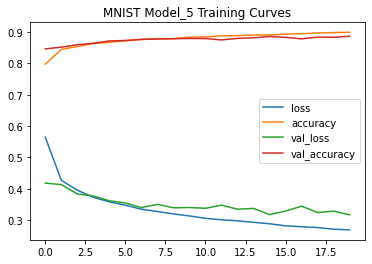

In [71]:
# Plot the training curves for mnist_model_5
pd.DataFrame(history_mnist_5.history).plot()
plt.title("MNIST Model_5 Training Curves")

No increase in accuracy from further training. 

Let's add some callbacks as well.
- EarlyStopping
- ReduceLrOnPlateau

In [72]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8,
                              patience=3, min_delta=0.1, min_lr=0.000001, verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=8, min_delta=0.05,
                               restore_best_weights=True)

checkpoint_dir = "model_experiments/"

In [75]:
# Build the model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
mnist_model_6 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

# Compile the model 
mnist_model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model 
history_mnist_6 = mnist_model_6.fit(train_data_norm, train_labels,
                                    epochs=30,
                                    validation_data=(test_data_norm, test_labels),
                                    callbacks=[reduce_lr, early_stopping, ModelCheckpoint(checkpoint_dir+"mnist_model_6", save_best_only=True)])

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5345 - accuracy: 0.8079 - val_loss: 0.4555 - val_accuracy: 0.8287 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4027 - accuracy: 0.8531 - val_loss: 0.3867 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3719 - accuracy: 0.8648 - val_loss: 0.3737 - val_accuracy: 0.8647 - lr: 0.0010
Epoch 4/30
1868/1875 [============================>.] - ETA: 0s - loss: 0.3503 - accuracy: 0.8712
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3504 - accuracy: 0.8711 - val_loss: 0.3684 - val_accuracy: 0.8668 - lr: 0.0010
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3251 - accuracy: 0.8799 - val_loss: 0.3514 - val_accuracy: 0.8732 - lr: 8.0000e-04
Epoch 6/30
1875/1875 [===========================

In [76]:
# Evaluate model 
mnist_model_6_results = mnist_model_6.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3260 - accuracy: 0.8850


In [77]:
# Load in the model with the best weights using the checkpoint created during training
mnist_model_6 = tf.keras.models.load_model("/content/model_experiments/mnist_model_6")

In [78]:
# Evaluate again
mnist_model_6.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3149 - accuracy: 0.8860


[0.3149013817310333, 0.8859999775886536]

We have created a Neural Network that was achieved 89%+ accuracy on the Fashion MNIST dataset.

## Visualize multiple image predictions for the Fashion MNIST model

In [79]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [80]:
import random 
import tensorflow as tf 
import matplotlib.pyplot as plt 

# Part of this function is from Zero to Mastery's Tensorflow Developer Course
def plot_random_images(model, images, true_labels, classes, num_of_images):
  """
  Picks random images, plots them and labels it with a prediction and truth label

  Parameters
  ----------

  Returns
  --------
  """
  plt.figure(figsize=(10,10))

  for image in range(num_of_images):

    # Set up random integer
    i = random.randint(0, len(images))

    # Get a random image to plot
    target_image = images[i]

    # Create predictions with inputted model 
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[tf.argmax(pred_probs, axis=1).numpy().item()]
    true_label = classes[true_labels[i]]

    # Plot the random image and and predicted/true label
    plt.subplot(2, int(num_of_images/2), image+1)
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the pred is right or wrong 
    if pred_label == true_label:
      color = 'green'
    else:
      color = 'red'

    plt.xlabel(f"Pred: {pred_label} ({100*tf.reduce_max(pred_probs):2.0f}%)", color=color)
    plt.title(classes[true_labels[i]])
    #plt.axis(False)


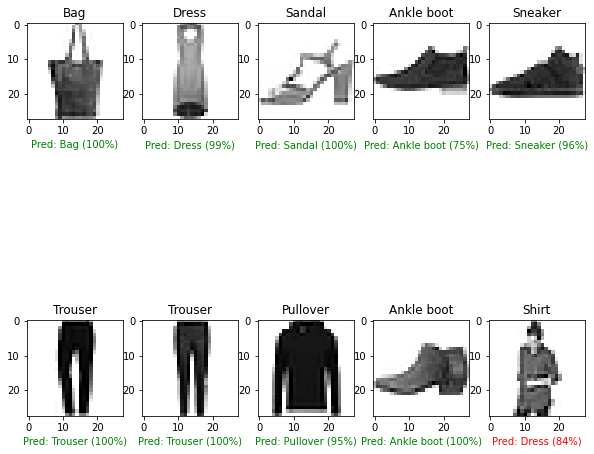

In [81]:
# Visualize 10 images, true labels, and predicted labels
plot_random_images(model=mnist_model_6, images=test_data_norm, true_labels=test_labels, 
                   classes=class_names, num_of_images=10)

Many of the incorrect predictions by the model are ones that most people would have a tough time on based on what I see.

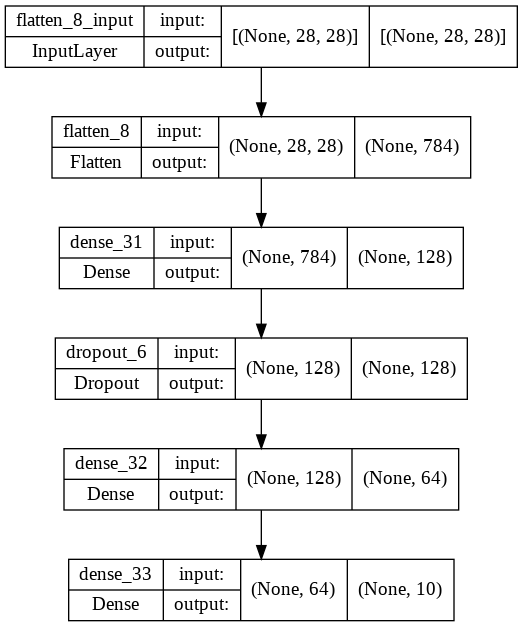

In [82]:
from tensorflow.keras.utils import plot_model 

# See the inputs and outputs of each layer
plot_model(mnist_model_6, show_shapes=True)

## Make function take a specific class from the fashion MNIST dataset and make prediction on it

In [83]:
test_data_norm.shape

(10000, 28, 28)

In [84]:
# Create function
def predict_on_image(model, images, class_name:str, classes, true_labels):
  """
  Function that will take in a trained TensorFlow model and the name of a class
  from the Fashion MNIST dataset

  Parameters
  ---------
  model : a trained TensorFlow model on the fashion MNIST dataset

  images : (array-like) array of images to be predicted on 

  class_name : (str) name of the class the function will predict and plot on. Only 
  accepts valid class names from the fashion MNIST dataset.
  Valid class names include: 
 'T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot'

  classes : (list) list of class names from Fashion MNIST dataset

  true_labels : (array-like) array of test_labels

  Returns 
  -------

  A plotted image of the specified class, true label and predicted label
  """

  if class_name not in class_names:
    print(f"{class_name} is not a class in the Fashion MNIST dataset")

  else:
    i = classes.index(class_name) # get index of specified class
    class_indexes = np.where(test_labels == i)[0] 
    target_image = images[random.choice(class_indexes)]

    # Make predictions and get predicted label
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[tf.argmax(pred_probs, axis=1).numpy().item()]
    true_label = classes[i]

  # Change the color of the titles depending on if the pred is right or wrong 
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)
  plt.xlabel(f"Pred: {pred_label} ({100*tf.reduce_max(pred_probs):2.0f}%)", color=color)
  plt.title(classes[i])
  #plt.axis(False)


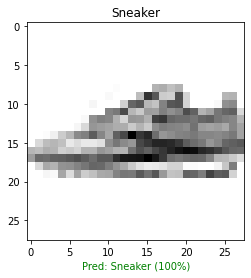

In [87]:
predict_on_image(model=mnist_model_4, images=test_data_norm, class_name='Sneaker',
                classes=class_names, true_labels=test_labels)